# RNN

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from sklearn.metrics import mean_absolute_error

import tensorflow as tf


2022-06-23 22:03:04.610639: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-23 22:03:04.610697: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [7]:
base = pd.read_csv('petr4.csv')
base = base.dropna()
base = base.iloc[:,1].values

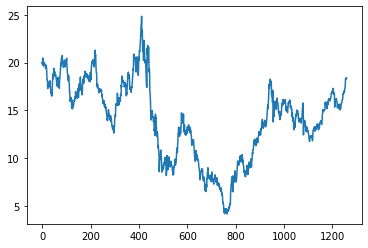

In [8]:

%matplotlib inline
plt.plot(base)


In [9]:
periodos = 30
previsao_futura = 1 # horizonte

In [10]:
X = base[0:(len(base) - (len(base) % periodos))]
X_batches = X.reshape(-1, periodos, 1)

y = base[1:(len(base) - (len(base) % periodos)) + previsao_futura]
y_batches = y.reshape(-1, periodos, 1)

X_teste = base[-(periodos + previsao_futura):]
X_teste = X_teste[:periodos]
X_teste = X_teste.reshape(-1, periodos, 1)
y_teste = base[-(periodos):]
y_teste = y_teste.reshape(-1, periodos, 1)


In [15]:
tf.reset_default_graph()

entradas = 1
neuronios_oculta = 100
neuronios_saida = 1

xph = tf.placeholder(tf.float32, [None, periodos, entradas])
yph = tf.placeholder(tf.float32, [None, periodos, neuronios_saida])

AttributeError: module 'tensorflow' has no attribute 'reset_default_graph'

In [14]:
#celula = tf.contrib.rnn.BasicRNNCell(num_units = neuronios_oculta, activation = tf.nn.relu)
#celula = tf.contrib.rnn.LSTMCell(num_units = neuronios_oculta, activation = tf.nn.relu)
# camada saída
#celula = tf.contrib.rnn.OutputProjectionWrapper(celula, output_size = 1)

def cria_uma_celula():
    return tf.contrib.rnn.LSTMCell(num_units = neuronios_oculta, activation = tf.nn.relu)

def cria_varias_celulas():
    celulas =  tf.nn.rnn_cell.MultiRNNCell([cria_uma_celula() for i in range(4)])
    return tf.contrib.rnn.DropoutWrapper(celulas, output_keep_prob = 0.1)

celula = cria_varias_celulas()
# camada saída
celula = tf.contrib.rnn.OutputProjectionWrapper(celula, output_size = 1)


saida_rnn, _ = tf.nn.dynamic_rnn(celula, xph, dtype = tf.float32)
erro = tf.losses.mean_squared_error(labels = yph, predictions = saida_rnn)
otimizador = tf.train.AdamOptimizer(learning_rate = 0.001)
treinamento = otimizador.minimize(erro)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoca in range(1000):
        _, custo = sess.run([treinamento, erro], feed_dict = {xph: X_batches, yph: y_batches})
        if epoca % 100 == 0:
            print(epoca + 1, ' erro: ', custo)
    
    previsoes = sess.run(saida_rnn, feed_dict = {xph: X_teste})
    

y_teste.shape
y_teste2 = np.ravel(y_teste)

previsoes2 = np.ravel(previsoes)
mae = mean_absolute_error(y_teste2, previsoes2)

plt.plot(y_teste2, '*', markersize = 10, label = 'Valor real')
plt.plot(previsoes2, 'o', label = 'Previsões')
plt.legend()

plt.plot(y_teste2, label = 'Valor real')
plt.plot(y_teste2, 'w*', markersize = 10, color = 'red')
plt.plot(previsoes2, label = 'Previsões')
plt.legend()

AttributeError: module 'tensorflow._api.v2.nn' has no attribute 'rnn_cell'